<a href="https://colab.research.google.com/github/SarkarPriyanshu/Machine-Learning-Models/blob/main/01_Analysis_of_Stopwords_and_Punctuations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install -q feature-engine

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 328.9/328.9 kB 4.6 MB/s eta 0:00:00


In [ ]:
!pip install -q spacy

In [ ]:
!python -m spacy download en

2023-11-18 09:15:14.664391: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
⚠ As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the
full pipeline package name 'en_core_web_sm' instead.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 37.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [ ]:
from google.colab import drive

# Mount your Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# importing basic libraries needed
import re
import spacy
import random
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
from spacy import displacy

from feature_engine import transformation as vt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report

# Loading different ploting style
plt.style.use('ggplot')
# Loading Spacy language model
nlp = spacy.load("en_core_web_sm")

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DataSets/twitter_training.csv').drop('2401',axis=1)

In [ ]:
df.shape

(74681, 3)

In [ ]:
df.columns = ['Topic','Sentiment','Content']

In [ ]:
df.sample(5)

,Topic,Sentiment,Content
66103,johnson&johnson,Negative,Both Johnson and Johnson could go to hell.
45389,Verizon,Negative,@verizon yall better let me get my iphone toda...
71563,TomClancysGhostRecon,Positive,I'm liking this new update for
15479,Dota2,Negative,"@DOTA2 fix ur game please, the goddamn match m..."
30243,ApexLegends,Neutral,2017 You came to the exact wrong house! @playa...


In [ ]:
df.isnull().sum() / df.shape[0] * 100

Topic        0.000000
Sentiment    0.000000
Content      0.918574
dtype: float64

In [ ]:
df.dropna(inplace=True)

## Initial Text Analysis Trial

In this trial, we aim to perform initial text analysis by extracting features such as stopwords count per document, punctuation count per document, and the count of useful words (derived from stopword and punctuation counts relative to sentence length). Additionally, we'll prepare these features for supervised machine learning models such as Logistic Regression or Naive Bayes.

### Steps:

#### 1. Text Analysis Functions:

Define functions to calculate necessary text features:

- `count_stopwords(string)`: Counts stopwords in a given string.
- `count_punctuations(string)`: Counts punctuations in a given string.
- `count_useful_words(string, count_punctuations, count_stopwords)`: Calculates the count of useful words based on stopword and punctuation counts relative to sentence length.

#### 2. DataFrame Manipulation:

Apply text analysis functions to the DataFrame:

- `Stopwords_Count`: Apply `count_stopwords` function to each document.
- `Punctuations_Count`: Apply `count_punctuations` function to each document.
- `Useful_Words`: Calculate the count of useful words (stopword + punctuation count - sentence length).

#### 3. Feature Transformation:

Transform the features:

- Normalize or scale the features as required (e.g., using StandardScaler).
- Prepare the features as input data for supervised learning models.

#### 4. Model Preparation:

Prepare the transformed features and the target variable for training supervised ML models:

- Features: Stopwords count, Punctuation count, Useful words count.
- Target variable: The label or output variable for supervised learning.

#### 5. Model Training:

Train the models:

- Use models like Logistic Regression or Naive Bayes to train on the prepared features and target variable.

### Example Usage:

```python
# Code to implement the steps mentioned above
# Define text analysis functions

# Apply functions to DataFrame to get feature columns

# Transform features using StandardScaler or other methods

# Prepare features and target variable for model training

# Train the models (e.g., Logistic Regression or Naive Bayes)


In [ ]:
# Define text analysis functions

# Apply functions to DataFrame to get feature columns

def count_stopwords(string):
    """
    Count the number of stopwords in the given string.

    Args:
    string (str): The input string to analyze.

    Returns:
    int: The count of stopwords.
    """
    doc = nlp(string)
    stopwords = list()
    for token in doc:
        if token.is_stop:
            stopwords.append(token)
    return len(stopwords)


def count_punctuations(string):
    """
    Count the number of punctuations in the given string.

    Args:
    string (str): The input string to analyze.

    Returns:
    int: The count of punctuations.
    """
    doc = nlp(string)
    punctuations = list()
    for token in doc:
        if token.is_punct:
            punctuations.append(token)
    return len(punctuations)


def count_useful_words(string, count_punctuations, count_stopwords):
    """
    Count the number of useful words in the given string by subtracting the count of punctuations
    and stopwords from the total length of the string.

    Args:
    string (str): The input string to analyze.
    count_punctuations (int): Count of punctuations.
    count_stopwords (int): Count of stopwords.

    Returns:
    int: The count of useful words.
    """
    return len(string) - (count_punctuations + count_stopwords)


# Example usage:
df = df.assign(
    Stopwords_Count=lambda x: x['Content'].apply(count_stopwords),
    Punctuations_Count=lambda x: x['Content'].apply(count_punctuations)
)

df['Useful_Words'] = df.apply(lambda x: count_useful_words(x['Content'], x['Punctuations_Count'], x['Stopwords_Count']), axis=1)


In [ ]:
df.sample(5)

,Topic,Sentiment,Content,Stopwords_Count,Punctuations_Count,Useful_Words
46738,HomeDepot,Positive,<unk> stop spending! Home stores and Lowes are...,6,4,90
32464,LeagueOfLegends,Positive,League's best theme by Robin,2,0,26
58767,Facebook,Negative,Facebook They spent their second whole day act...,22,2,222
30417,LeagueOfLegends,Positive,The most stupid reason why to troll a @LeagueO...,27,6,250
14741,Dota2,Irrelevant,WePlay! once again proving they are the best T...,7,2,50


In [ ]:
def show_different_distributions(feat1, feat2, feat3, transform=False, funct=None, stats_transform=False, dist_name=None):
    """
    Display histograms showcasing the distribution of different metrics or features.

    Args:
    feat1 (str): Name of the first feature/metric to display.
    feat2 (str): Name of the second feature/metric to display.
    feat3 (str): Name of the third feature/metric to display.
    transform (bool): Flag indicating whether to apply a transformation to the data. Default is False.
    funct (function): Transformation function to apply if transform is True. Default is None.
    stats_transform (bool): Flag indicating whether to use statistical transformations. Default is False.
    dist_name (str): Name of the distribution being visualized. Default is None.

    Returns:
    None
    """
    import matplotlib.pyplot as plt

    fig, ax = plt.subplots(1, 3, figsize=(20, 5))

    fig.suptitle(f'Different Metric {dist_name}', y=1.03)

    if transform:
        ax[0].hist(funct(df[feat1]))
        ax[1].hist(funct(df[feat2]))
        ax[2].hist(funct(df[feat3]))
    elif stats_transform:
        transformed_data_1, lambda_ = funct(df[feat1])
        transformed_data_2, lambda_ = funct(df[feat2])
        transformed_data_3, lambda_ = funct(df[feat3])

        ax[0].hist(transformed_data_1)
        ax[1].hist(transformed_data_2)
        ax[2].hist(transformed_data_3)
    else:
        ax[0].hist(df[feat1])
        ax[1].hist(df[feat2])
        ax[2].hist(df[feat3])

    ax[0].set_ylabel('No of sentences')
    ax[1].set_ylabel('No of sentences')
    ax[2].set_ylabel('No of sentences')

    ax[0].set_xlabel(f'Count of {feat1}')
    ax[1].set_xlabel(f'Count of {feat2}')
    ax[2].set_xlabel(f'Count of {feat3}')

    ax[0].set_xlim(0, 100)
    ax[1].set_xlim(0, 100)

    ax[0].set_title(f'Distribution of {feat1}')
    ax[1].set_title(f'Distribution of {feat2}')
    ax[2].set_title(f'Distribution of {feat3}')
    plt.show()


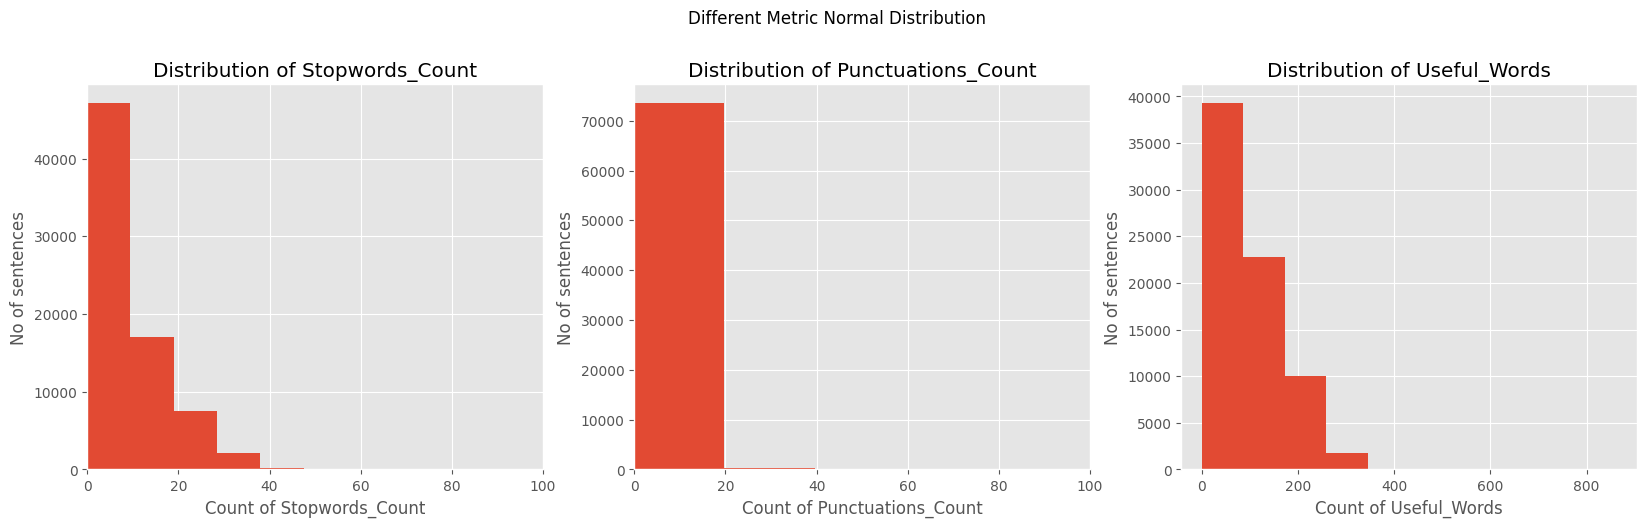

In [ ]:
# Transform features using StandardScaler or other methods
# Normal distribution
show_different_distributions('Stopwords_Count','Punctuations_Count','Useful_Words',dist_name='Normal Distribution')

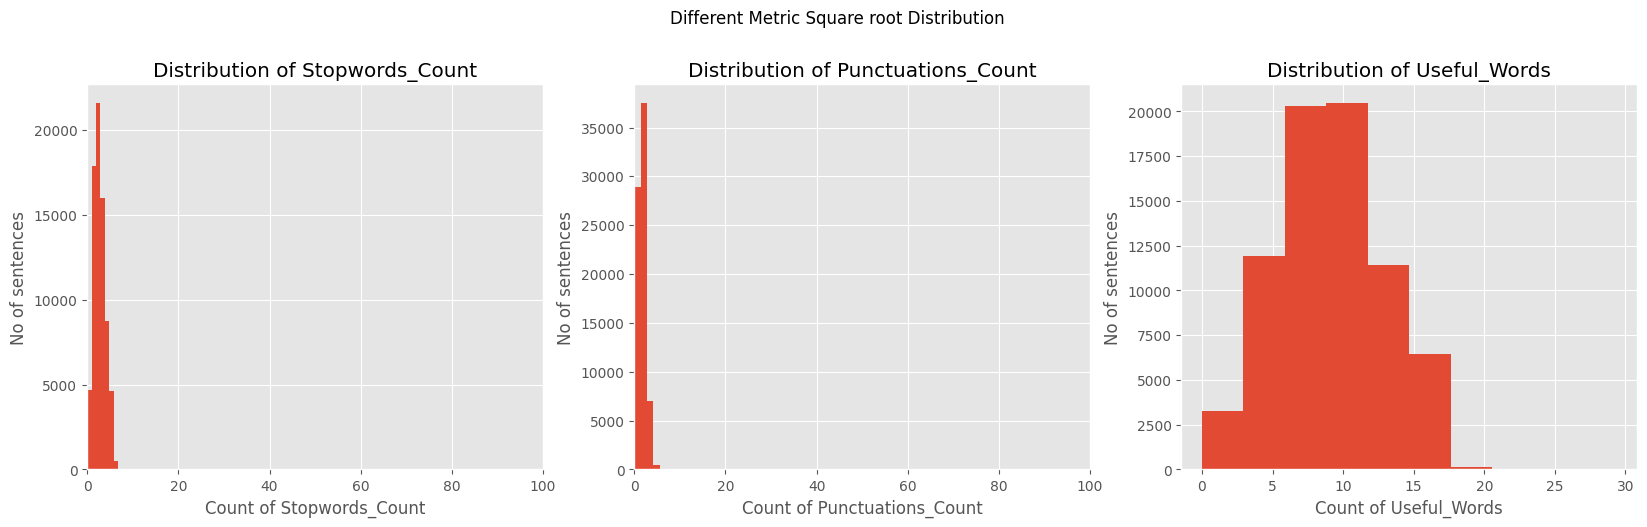

In [ ]:
# sqrt transformation
show_different_distributions('Stopwords_Count','Punctuations_Count','Useful_Words',True,np.sqrt,dist_name='Square root Distribution')

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)


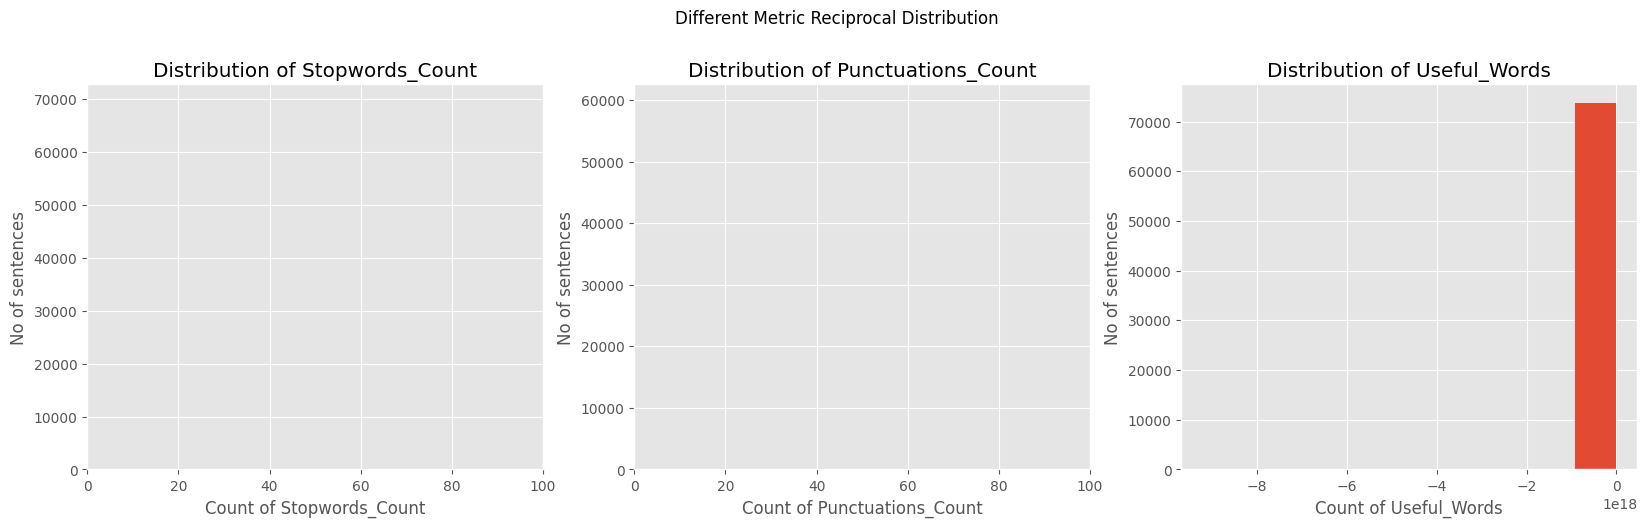

In [ ]:
# reciprocal tansformation
show_different_distributions('Stopwords_Count','Punctuations_Count','Useful_Words',True,np.reciprocal,dist_name='Reciprocal Distribution')

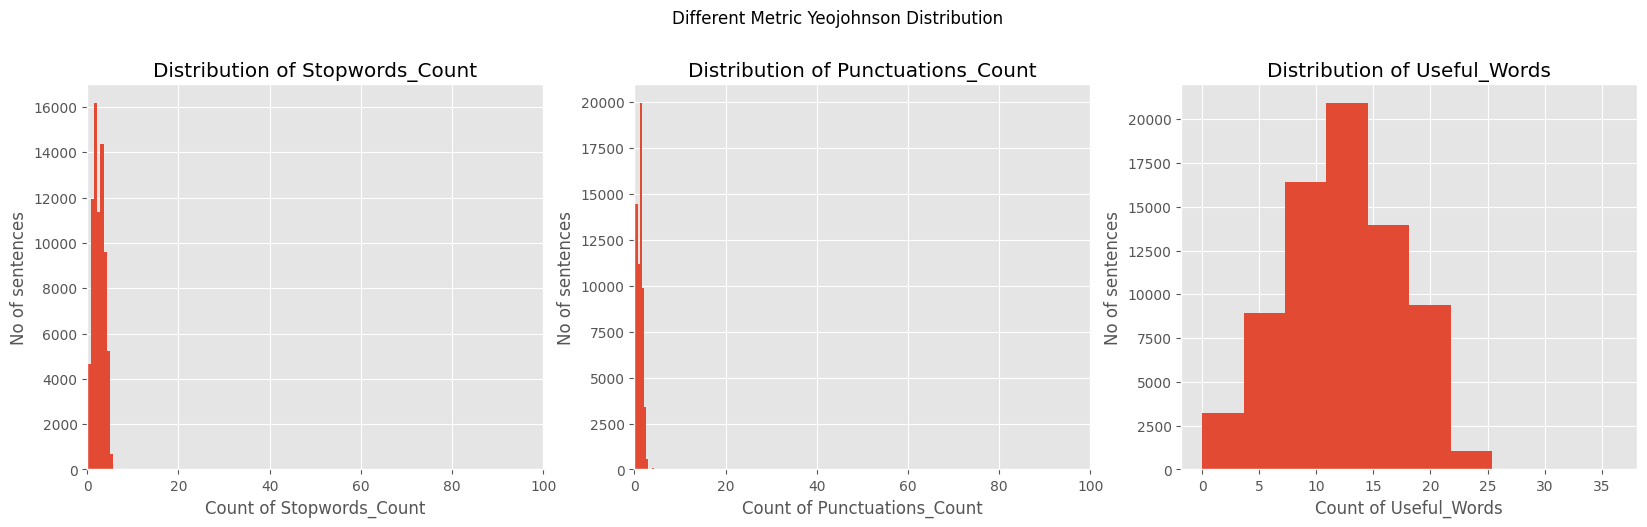

In [ ]:
# yeojohnson transformation
show_different_distributions('Stopwords_Count','Punctuations_Count','Useful_Words',funct=stats.yeojohnson,stats_transform=True,dist_name='Yeojohnson Distribution')

## Observations and Transformation Decision

### Analysis of Metric Distributions

Upon analysis of different metrics, it was observed that applying the Yeo-Johnson transformation has noticeably brought the distributions closer to a normal distribution compared to other transformation methods.

### Decision to Apply Yeo-Johnson Transformation

Given that the Yeo-Johnson transformation shows a positive impact in making the different metric distributions more akin to a normal distribution, the decision has been made to apply the Yeo-Johnson transformation to these metrics.

### Rationale

- **Normality Assumption:** The Yeo-Johnson transformation tends to bring data closer to a normal distribution, aligning with the assumptions of certain statistical methods or machine learning models that perform better with normally distributed data.
- **Improved Analysis:** Transforming the data allows for improved interpretability and better performance in certain analytical methods that assume normality.

### Next Steps

- **Transformation Implementation:** Apply the Yeo-Johnson transformation to the metrics.
- **Further Analysis:** Use the transformed metrics in subsequent analysis or modeling to leverage the benefits of the transformation and potentially improve the results.

By applying the Yeo-Johnson transformation to the metrics, the goal is to make the data more suitable for analysis or modeling, taking advantage of its tendency to make distributions more normal-like.


## Plan: Scikit-learn Pipeline and Classification Performance Evaluation

### Objective
The objective is to create a Scikit-learn pipeline to preprocess the features (stopword count, punctuation count, useful words count) by applying the Yeo-Johnson transformation and scaling. Subsequently, different classification machine learning algorithms will be applied to evaluate their performance.

### Plan Steps

1. **Feature Preprocessing Pipeline:**
    - **Yeo-Johnson Transformation:** Apply Yeo-Johnson transformation to handle non-normality.
    - **Scaling:** Scale the features to have similar scales for better model training.

2. **Model Evaluation:**
    - **Classification Algorithms:** Utilize various classification algorithms from Scikit-learn:
        - Logistic Regression
        - Decision Tree
        - Random Forest
        - Support Vector Machine (SVM)
        - Naive Bayes
        - Gradient Boosting

3. **Evaluation Metrics:**
    - Use appropriate evaluation metrics such as accuracy, precision, recall, F1-score, and area under the ROC curve (AUC-ROC).
    - Cross-validation: Employ cross-validation for robust model evaluation.

4. **Implementation Steps:**
    - **Data Preparation:** Extract and preprocess the features.
    - **Pipeline Creation:** Build a Scikit-learn pipeline incorporating Yeo-Johnson transformation and scaling.
    - **Model Training:** Train each classification algorithm on the transformed features.
    - **Performance Evaluation:** Evaluate model performance using chosen evaluation metrics.
    - **Compare and Analyze Results:** Compare the performance of different algorithms and analyze the best-performing model.

### Expected Outcomes
- Determine the most suitable classification algorithm for the given features post-transformation.
- Understand the impact of Yeo-Johnson transformation and scaling on model performance.
- Obtain insights into the classification task's feasibility and model performance for future improvements.

This plan aims to systematically analyze and compare the performance of different classification algorithms after applying feature transformations and scaling, providing valuable insights for model selection in the classification task.


In [ ]:
data = df[['Sentiment','Stopwords_Count','Punctuations_Count','Useful_Words']]

In [ ]:
data.shape

(73995, 4)

In [ ]:
data.sample(5)

,Sentiment,Stopwords_Count,Punctuations_Count,Useful_Words
36523,Neutral,3,5,93
321,Positive,26,6,202
7503,Irrelevant,7,0,79
15362,Negative,1,0,47
62022,Neutral,10,1,59


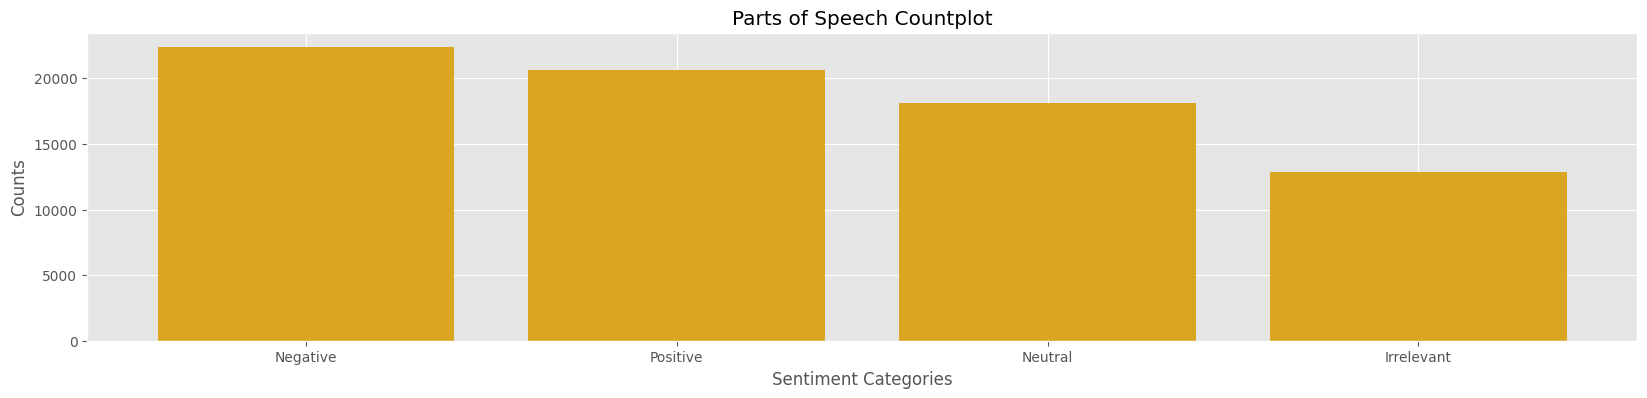

In [ ]:
labels = data['Sentiment'].value_counts().index
values = data['Sentiment'].value_counts().values
fig,ax = plt.subplots(figsize=(20,4))

ax.set_title('Countplot of Sentiments')

ax.set_title('Parts of Speech Countplot')
ax.bar(labels,values,color='goldenrod')

ax.set_xlabel('Sentiment Categories')
ax.set_ylabel('Counts')

plt.show()

In [ ]:
data['Sentiment'] = data['Sentiment'].map({value:index for index,value in enumerate(labels)})

<ipython-input-26-06a36be98f99>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Sentiment'] = data['Sentiment'].map({value:index for index,value in enumerate(labels)})


In [ ]:
data.sample(5)

,Sentiment,Stopwords_Count,Punctuations_Count,Useful_Words
15790,2,1,3,82
43123,3,3,1,42
59493,2,12,0,93
42063,0,5,5,146
71222,2,27,2,248


In [ ]:
data.describe()

,Sentiment,Stopwords_Count,Punctuations_Count,Useful_Words
count,73995.000000,73995.000000,73995.000000,73995.000000
mean,1.290560,8.896534,3.340374,96.547496
std,1.076317,7.981590,5.720392,70.516188
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,3.000000,1.000000,41.000000
50%,1.000000,7.000000,2.000000,81.000000
75%,2.000000,13.000000,5.000000,135.000000
max,3.000000,95.000000,198.000000,862.000000


<Axes: >

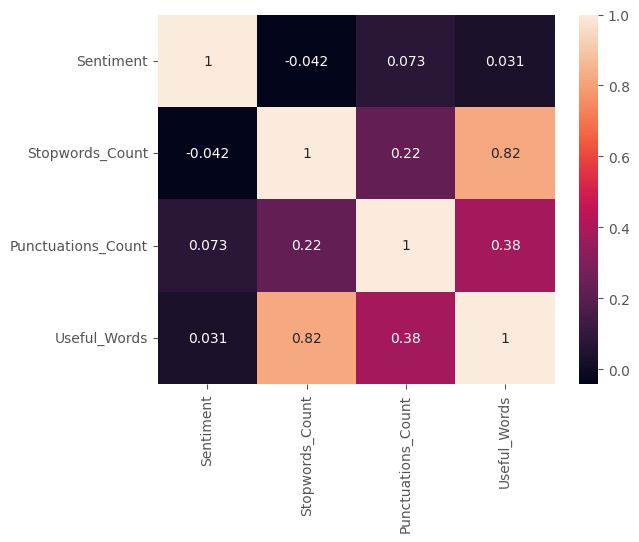

In [ ]:
sns.heatmap(data.corr(),annot=True)

<Axes: xlabel='Sentiment', ylabel='Punctuations_Count'>

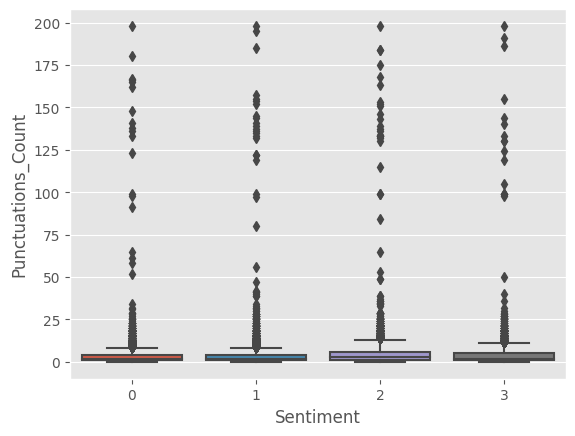

In [ ]:
sns.boxplot(data=data,x='Sentiment',y='Punctuations_Count')

<Axes: xlabel='Sentiment', ylabel='Stopwords_Count'>

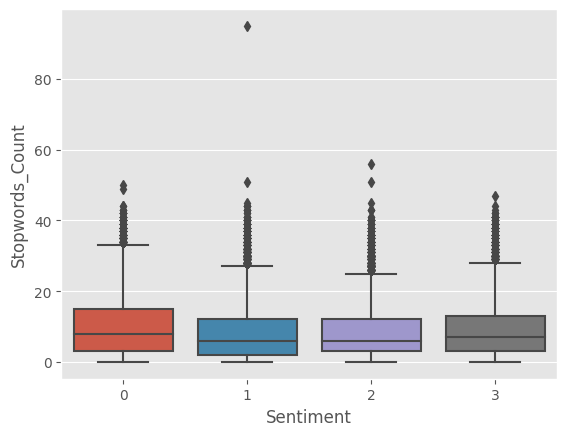

In [ ]:
sns.boxplot(data=data,x='Sentiment',y='Stopwords_Count')

<Axes: xlabel='Sentiment', ylabel='Useful_Words'>

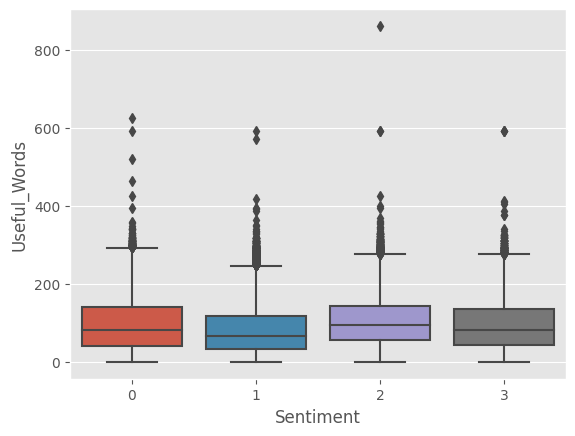

In [ ]:
sns.boxplot(data=data,x='Sentiment',y='Useful_Words')

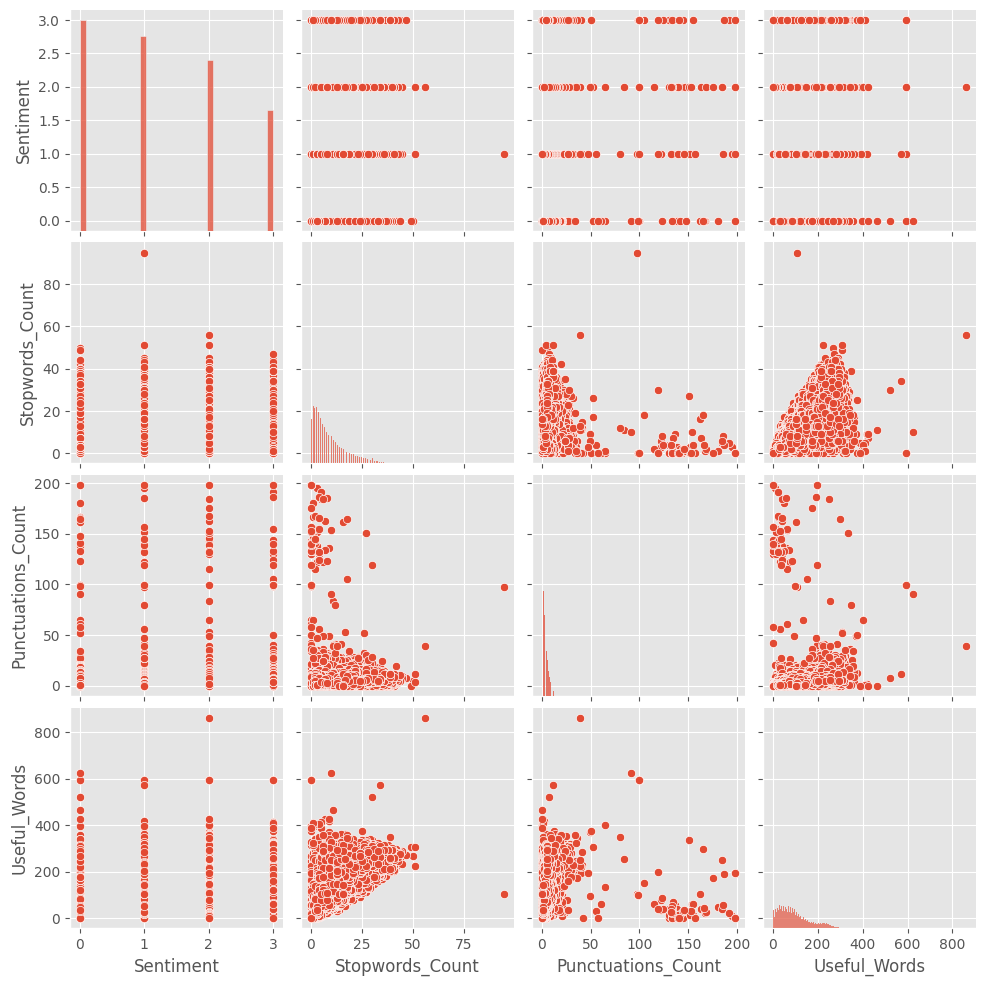

In [ ]:
sns.pairplot(data=data)

In [ ]:
X,y = data.drop('Sentiment',axis=1),data['Sentiment']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((51796, 3), (22199, 3), (51796,), (22199,))

In [ ]:
X_train.sample()

,Stopwords_Count,Punctuations_Count,Useful_Words
64601,2,2,84


In [ ]:
pipe = Pipeline([
    ('Yeojohnson_Transformation',vt.YeoJohnsonTransformer(variables = ['Stopwords_Count', 'Punctuations_Count','Useful_Words'])),
    ('Standard_Scaler',StandardScaler())
])

In [ ]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('Yeojohnson_Transformation',
                 YeoJohnsonTransformer(variables=['Stopwords_Count',
                                                  'Punctuations_Count',
                                                  'Useful_Words'])),
                ('Standard_Scaler', StandardScaler())])

In [ ]:
X_trained_transfomed = pipe.transform(X_train)

<Axes: >

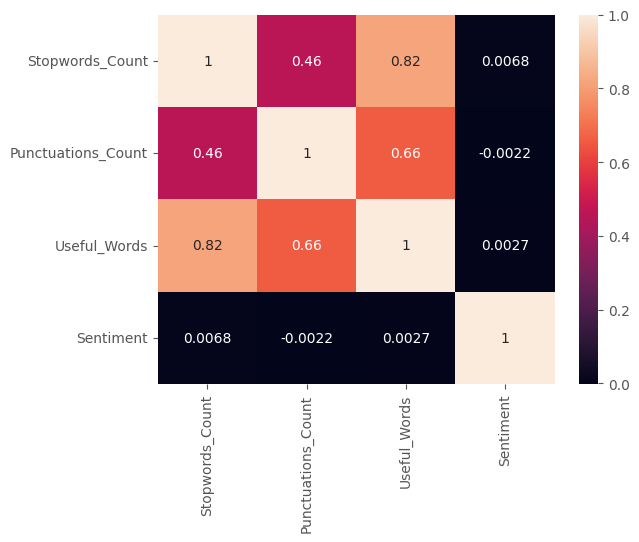

In [ ]:
after_transformed_data = pd.concat((pd.DataFrame(X_trained_transfomed,columns=['Stopwords_Count',	'Punctuations_Count',	'Useful_Words']), pd.Series(y_train)), axis=1).reset_index(drop=True).dropna()
sns.heatmap(after_transformed_data.corr(),annot=True)

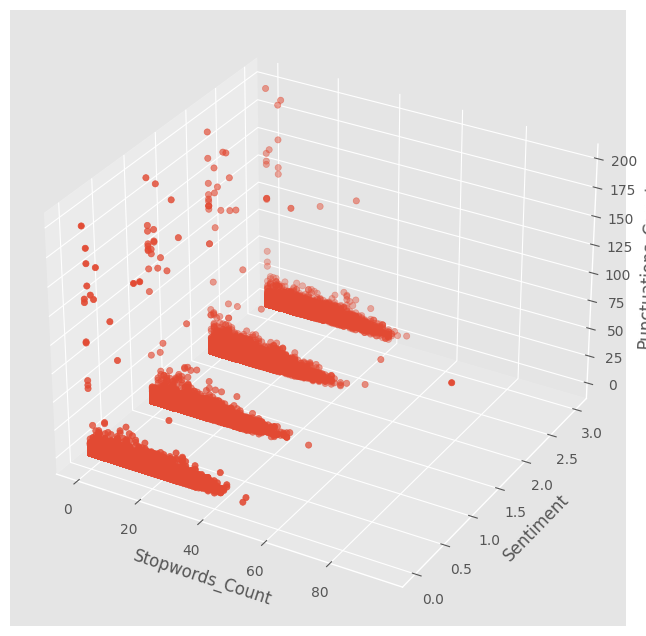

In [ ]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')
ax.scatter(data['Stopwords_Count'], data['Sentiment'], data['Punctuations_Count'])

ax.set_xlabel('Stopwords_Count')
ax.set_ylabel('Sentiment')
ax.set_zlabel('Punctuations_Count')

plt.show()

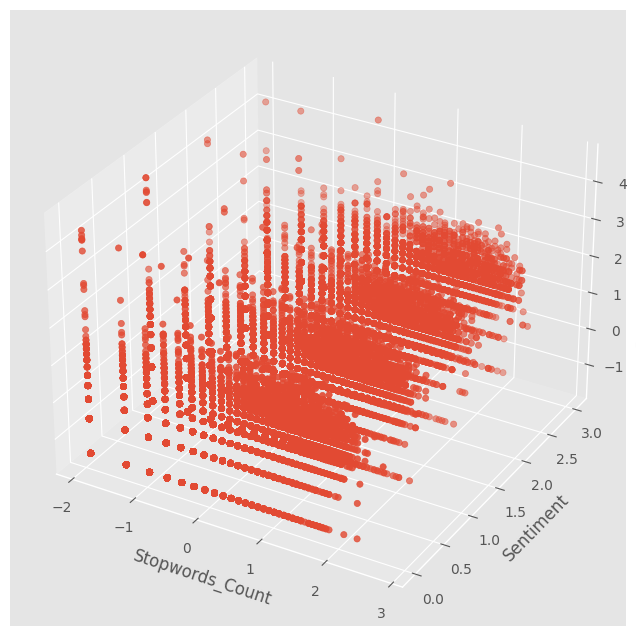

In [ ]:

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')
ax.scatter(after_transformed_data['Stopwords_Count'], after_transformed_data['Sentiment'], after_transformed_data['Punctuations_Count'])

ax.set_xlabel('Stopwords_Count')
ax.set_ylabel('Sentiment')
ax.set_zlabel('Punctuations_Count')

plt.show()

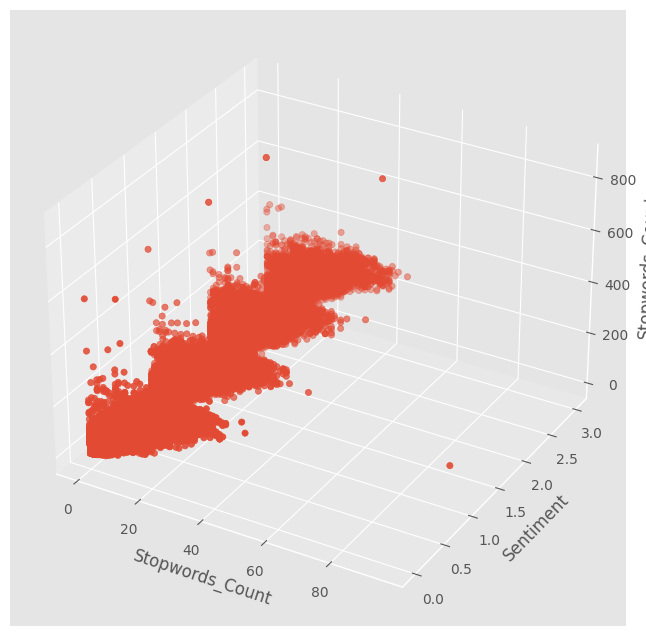

In [ ]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='3d')
ax.scatter(data['Stopwords_Count'], data['Sentiment'], data['Useful_Words'])

ax.set_xlabel('Stopwords_Count')
ax.set_ylabel('Sentiment')
ax.set_zlabel('Stopwords_Count')

plt.show()

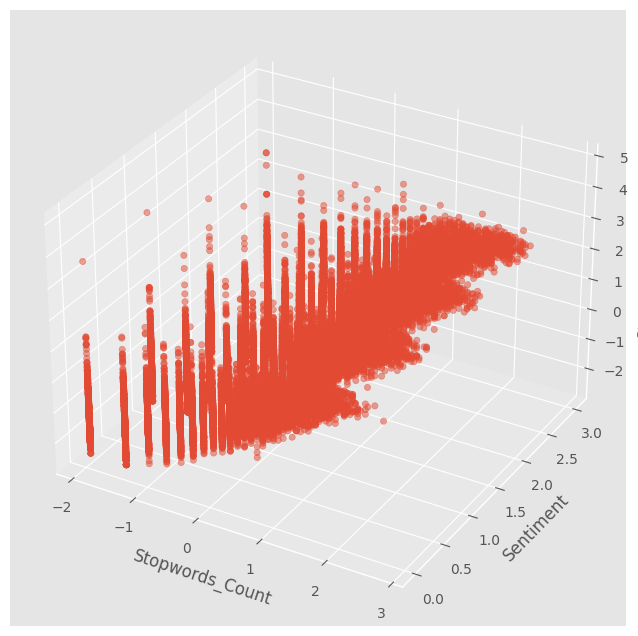

In [ ]:

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='3d')
ax.scatter(after_transformed_data['Stopwords_Count'], after_transformed_data['Sentiment'], after_transformed_data['Useful_Words'],alpha=0.5)

ax.set_xlabel('Stopwords_Count')
ax.set_ylabel('Sentiment')
ax.set_zlabel('Stopwords_Count')

plt.show()

In [ ]:
Lr_model = LogisticRegression(solver='saga',multi_class='ovr')

In [ ]:
Lr_model = Lr_model.fit(X_trained_transfomed,y_train)

In [ ]:
X_pred = Lr_model.predict(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [ ]:
cm = confusion_matrix(y_train,X_pred)

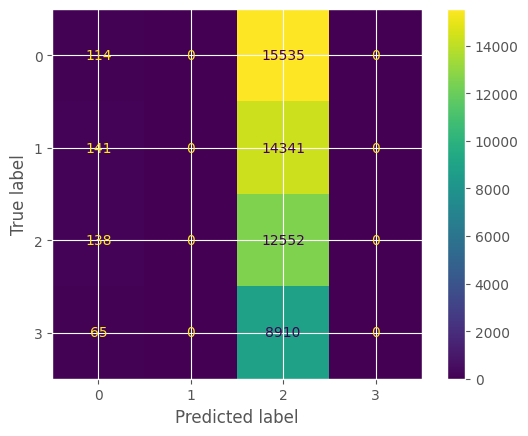

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=Lr_model.classes_)
disp.plot()

In [ ]:
print(classification_report(y_train,X_pred))

              precision    recall  f1-score   support

           0       0.25      0.01      0.01     15649
           1       0.00      0.00      0.00     14482
           2       0.24      0.99      0.39     12690
           3       0.00      0.00      0.00      8975

    accuracy                           0.24     51796
   macro avg       0.12      0.25      0.10     51796
weighted avg       0.14      0.24      0.10     51796



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Analysis Findings

After conducting an in-depth analysis, it has been determined that the features `Stopwords_Count`, `Punctuations_Count`, and `UsefulWords` do not significantly contribute to predicting sentiment.
